# ОИАД. Лабораторная работа №2

Воробей Артём Владимирович  
N = 2

## Задание

1. Расчет корреляций (Фехнера, Пирсона с ДИ, Спирмена, Кендалла)
2. Визуализация (гистограммы, scatter plot)
3. Уравнения регрессии (линейная, квадратичная, гиперболическая, показательная)
4. Проверка критерием Фишера (для лучшей и худшей модели)
5. Выводы

---


## 0. Импорт библиотек


In [9]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats
from scipy.stats import pearsonr, spearmanr, kendalltau
import warnings
warnings.filterwarnings('ignore')

# Настройка стиля графиков
plt.style.use('seaborn-v0_8-whitegrid')

# Создание директории для графиков
os.makedirs("graphics", exist_ok=True)

print("✓ Библиотеки загружены")


✓ Библиотеки загружены


## 0.1. Загрузка и подготовка данных


In [10]:
# Параметры 
N = 2  
col1_idx = N % 5           # 2 -> income
col2_idx = (N ** 2) % 5 + 5  # 9 -> test_time

df = pd.read_csv("../../datasets/students_simple.csv")
columns = df.columns.tolist()

col1_name = columns[col1_idx]
col2_name = columns[col2_idx]

x = df[col1_name].values
y = df[col2_name].values

# Удаление NaN значений
mask = ~(np.isnan(x) | np.isnan(y))
x = x[mask]
y = y[mask]

print("=" * 60)
print("ЛАБОРАТОРНАЯ РАБОТА №2")
print("Студент: Воробей Артём Владимирович")
print("=" * 60)
print(f"\nНомер в списке: N = {N}")
print(f"Выбранные столбцы:")
print(f"  - X: {col1_name} (индекс {col1_idx})")
print(f"  - Y: {col2_name} (индекс {col2_idx})")
print(f"Количество наблюдений: {len(x)}")
print(f"\nПервые 5 значений:")
print(pd.DataFrame({'X (income)': x[:5], 'Y (test_time)': y[:5]}))


ЛАБОРАТОРНАЯ РАБОТА №2
Студент: Воробей Артём Владимирович

Номер в списке: N = 2
Выбранные столбцы:
  - X: income (индекс 2)
  - Y: test_time (индекс 9)
Количество наблюдений: 20

Первые 5 значений:
   X (income)  Y (test_time)
0         430            8.5
1         640            6.2
2         610            6.8
3         330           12.0
4         420            7.5


## 1. Расчет корреляций


### 1.1. Корреляция Фехнера


In [11]:
def fechner_correlation(x, y):
    """
    Корреляция Фехнера (коэффициент знаков).
    Измеряет согласованность отклонений от средних значений.
    """
    n = len(x)
    x_mean = np.mean(x)
    y_mean = np.mean(y)
    
    # Знаки отклонений от среднего
    x_signs = np.sign(x - x_mean)
    y_signs = np.sign(y - y_mean)
    
    # Подсчет совпадений и несовпадений знаков
    concordant = np.sum(x_signs == y_signs)
    discordant = np.sum(x_signs != y_signs)
    
    # Коэффициент Фехнера
    return (concordant - discordant) / n

fechner_r = fechner_correlation(x, y)
print(f"Корреляция Фехнера: {fechner_r:.4f}")


Корреляция Фехнера: -0.4000


### 1.2. Корреляция Пирсона с доверительным интервалом


In [12]:
def pearson_with_ci(x, y, alpha=0.05):
    """
    Корреляция Пирсона с доверительным интервалом.
    Использует преобразование Фишера для построения ДИ.
    """
    r, p_value = pearsonr(x, y)
    n = len(x)
    
    if n <= 3:
        return r, p_value, (np.nan, np.nan)
    
    z = np.arctanh(r)
    
    se = 1 / np.sqrt(n - 3)
    
    z_crit = stats.norm.ppf(1 - alpha / 2)
    
    z_lower = z - z_crit * se
    z_upper = z + z_crit * se
    
    r_lower = np.tanh(z_lower)
    r_upper = np.tanh(z_upper)
    
    return r, p_value, (r_lower, r_upper)

pearson_r, pearson_p, pearson_ci = pearson_with_ci(x, y)
print(f"Корреляция Пирсона: {pearson_r:.4f}")
print(f"p-value: {pearson_p:.4f}")
print(f"95% доверительный интервал: [{pearson_ci[0]:.4f}, {pearson_ci[1]:.4f}]")


Корреляция Пирсона: -0.5699
p-value: 0.0087
95% доверительный интервал: [-0.8085, -0.1703]


### 1.3. Корреляции Спирмена и Кендалла


In [13]:
spearman_r, spearman_p = spearmanr(x, y)
print(f"Корреляция Спирмена: {spearman_r:.4f}")
print(f"p-value: {spearman_p:.4f}")

kendall_r, kendall_p = kendalltau(x, y)
print(f"\nКорреляция Кендалла: {kendall_r:.4f}")
print(f"p-value: {kendall_p:.4f}")


Корреляция Спирмена: -0.5392
p-value: 0.0142

Корреляция Кендалла: -0.4362
p-value: 0.0077


### 1.4. Сводная таблица корреляций


In [14]:
correlation_summary = pd.DataFrame({
    'Метод': ['Фехнер', 'Пирсон', 'Спирмен', 'Кендалл'],
    'Коэффициент': [fechner_r, pearson_r, spearman_r, kendall_r],
    'p-value': ['-', f'{pearson_p:.4f}', f'{spearman_p:.4f}', f'{kendall_p:.4f}']
})

print("\n" + "=" * 60)
print("СВОДНАЯ ТАБЛИЦА КОРРЕЛЯЦИЙ")
print("=" * 60)
print(correlation_summary.to_string(index=False))



СВОДНАЯ ТАБЛИЦА КОРРЕЛЯЦИЙ
  Метод  Коэффициент p-value
 Фехнер    -0.400000       -
 Пирсон    -0.569894  0.0087
Спирмен    -0.539157  0.0142
Кендалл    -0.436176  0.0077


## 2. Визуализация


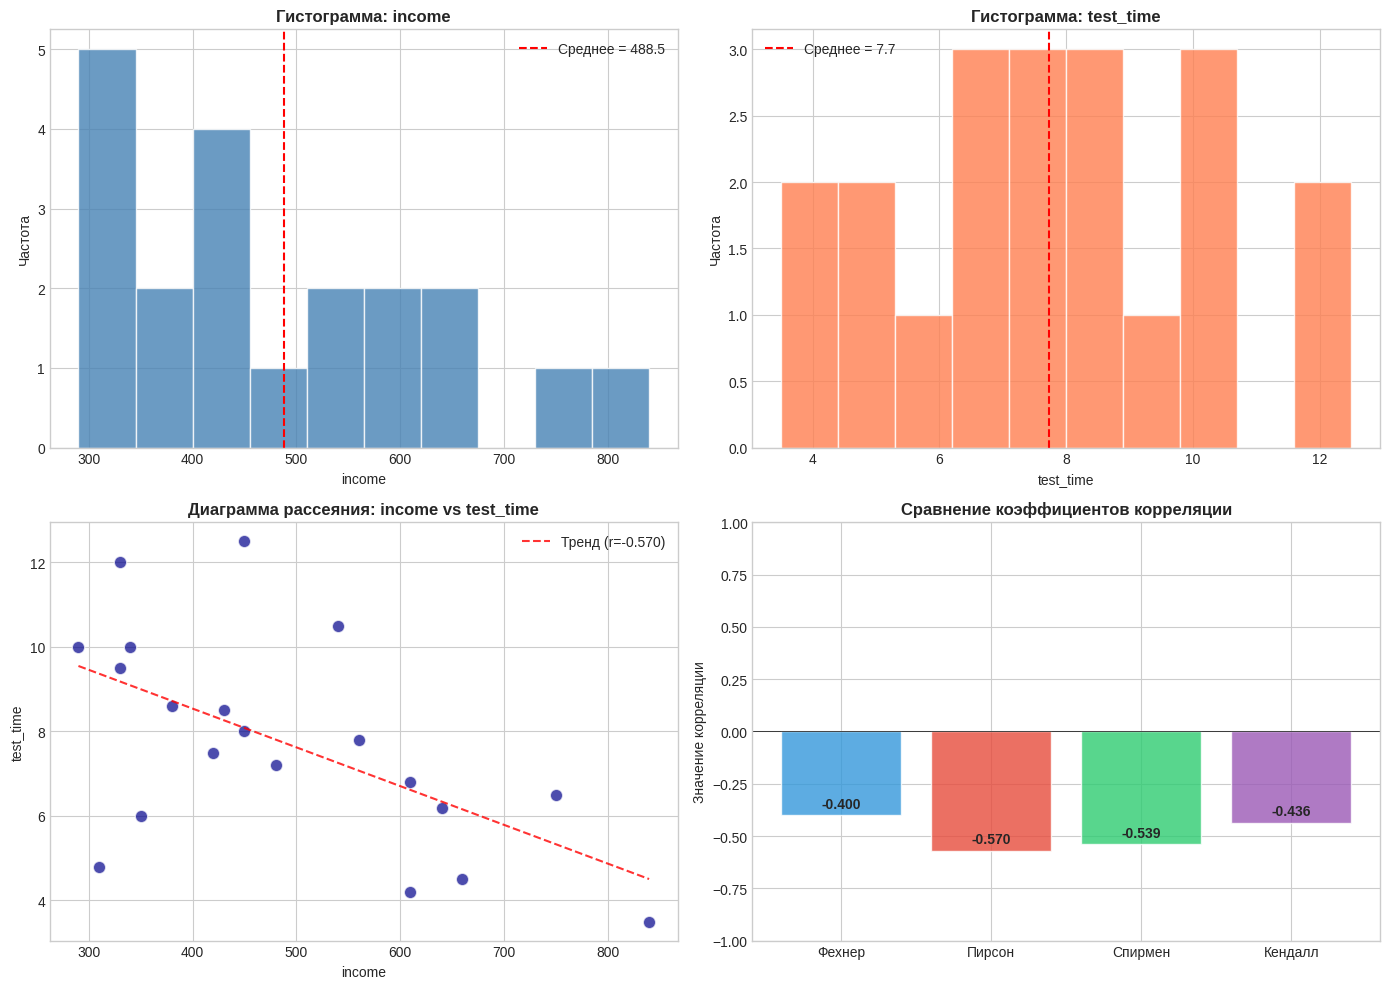

✓ Графики сохранены в graphics/visualizations.png


In [15]:
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

axes[0, 0].hist(x, bins=10, color='steelblue', edgecolor='white', alpha=0.8)
axes[0, 0].set_title(f'Гистограмма: {col1_name}', fontsize=12, fontweight='bold')
axes[0, 0].set_xlabel(col1_name)
axes[0, 0].set_ylabel('Частота')
axes[0, 0].axvline(np.mean(x), color='red', linestyle='--', label=f'Среднее = {np.mean(x):.1f}')
axes[0, 0].legend()

axes[0, 1].hist(y, bins=10, color='coral', edgecolor='white', alpha=0.8)
axes[0, 1].set_title(f'Гистограмма: {col2_name}', fontsize=12, fontweight='bold')
axes[0, 1].set_xlabel(col2_name)
axes[0, 1].set_ylabel('Частота')
axes[0, 1].axvline(np.mean(y), color='red', linestyle='--', label=f'Среднее = {np.mean(y):.1f}')
axes[0, 1].legend()

axes[1, 0].scatter(x, y, c='darkblue', alpha=0.7, s=80, edgecolors='white')
axes[1, 0].set_title(f'Диаграмма рассеяния: {col1_name} vs {col2_name}', fontsize=12, fontweight='bold')
axes[1, 0].set_xlabel(col1_name)
axes[1, 0].set_ylabel(col2_name)

z = np.polyfit(x, y, 1)
p = np.poly1d(z)
x_trend = np.linspace(x.min(), x.max(), 100)
axes[1, 0].plot(x_trend, p(x_trend), 'r--', alpha=0.8, label=f'Тренд (r={pearson_r:.3f})')
axes[1, 0].legend()

correlations = {
    'Фехнер': fechner_r,
    'Пирсон': pearson_r,
    'Спирмен': spearman_r,
    'Кендалл': kendall_r
}
names = list(correlations.keys())
values = list(correlations.values())
colors = ['#3498db', '#e74c3c', '#2ecc71', '#9b59b6']

bars = axes[1, 1].bar(names, values, color=colors, edgecolor='white', alpha=0.8)
axes[1, 1].set_title('Сравнение коэффициентов корреляции', fontsize=12, fontweight='bold')
axes[1, 1].set_ylabel('Значение корреляции')
axes[1, 1].set_ylim(-1, 1)
axes[1, 1].axhline(0, color='black', linewidth=0.5)

for bar, val in zip(bars, values):
    axes[1, 1].text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.02,
                    f'{val:.3f}', ha='center', va='bottom', fontsize=10, fontweight='bold')

plt.tight_layout()
plt.savefig('graphics/visualizations.png', dpi=150, bbox_inches='tight')
plt.show()

print("✓ Графики сохранены в graphics/visualizations.png")


## 3. Уравнения регрессии


### 3.1. Линейная регрессия (реализация вручную)


In [16]:
def linear_regression_manual(x, y):
    """
    Линейная регрессия: y = w1*x + w0
    Реализация методом наименьших квадратов вручную.
    """
    n = len(x)
    sum_x = np.sum(x)
    sum_y = np.sum(y)
    sum_xy = np.sum(x * y)
    sum_x2 = np.sum(x ** 2)
    
    w1 = (n * sum_xy - sum_x * sum_y) / (n * sum_x2 - sum_x ** 2)
    w0 = (sum_y - w1 * sum_x) / n
    
    return w0, w1

w0_lin, w1_lin = linear_regression_manual(x, y)
print(f"Линейная регрессия: y = {w1_lin:.4f}*x + {w0_lin:.4f}")
print(f"\nИнтерпретация:")
print(f"  - При увеличении {col1_name} на 1 единицу,")
print(f"    {col2_name} {'увеличивается' if w1_lin > 0 else 'уменьшается'} на {abs(w1_lin):.4f} единиц")
print(f"  - При {col1_name} = 0, {col2_name} ≈ {w0_lin:.4f}")


Линейная регрессия: y = -0.0092*x + 12.2089

Интерпретация:
  - При увеличении income на 1 единицу,
    test_time уменьшается на 0.0092 единиц
  - При income = 0, test_time ≈ 12.2089


### 3.2. Квадратичная регрессия


In [17]:
def quadratic_regression(x, y):
    """
    Квадратичная регрессия: y = w2*x^2 + w1*x + w0
    Использует нормальные уравнения.
    """
    n = len(x)
    X = np.column_stack([np.ones(n), x, x ** 2])
    
    XTX = X.T @ X
    XTy = X.T @ y
    
    w = np.linalg.solve(XTX, XTy)
    return w[0], w[1], w[2]  

w0_quad, w1_quad, w2_quad = quadratic_regression(x, y)
print(f"Квадратичная регрессия: y = {w2_quad:.6f}*x² + {w1_quad:.4f}*x + {w0_quad:.4f}")


Квадратичная регрессия: y = -0.000018*x² + 0.0097*x + 7.6017


### 3.3. Гиперболическая регрессия


In [18]:
def hyperbolic_regression(x, y):
    """
    Гиперболическая регрессия: y = w1/x + w0
    Линеаризация заменой переменной: z = 1/x
    """
    x_safe = np.where(x == 0, 1e-10, x)
    z = 1 / x_safe
    
    n = len(z)
    sum_z = np.sum(z)
    sum_y = np.sum(y)
    sum_zy = np.sum(z * y)
    sum_z2 = np.sum(z ** 2)
    
    w1 = (n * sum_zy - sum_z * sum_y) / (n * sum_z2 - sum_z ** 2)
    w0 = (sum_y - w1 * sum_z) / n
    
    return w0, w1

w0_hyp, w1_hyp = hyperbolic_regression(x, y)
print(f"Гиперболическая регрессия: y = {w1_hyp:.4f}/x + {w0_hyp:.4f}")


Гиперболическая регрессия: y = 1832.3465/x + 3.6149


### 3.4. Показательная регрессия


In [19]:
def exponential_regression(x, y):
    """
    Показательная регрессия: y = w0 * w1^x
    Линеаризация логарифмированием: ln(y) = ln(w0) + x*ln(w1)
    """
    y_safe = np.where(y <= 0, 1e-10, y)
    log_y = np.log(y_safe)
    
    n = len(x)
    sum_x = np.sum(x)
    sum_log_y = np.sum(log_y)
    sum_x_log_y = np.sum(x * log_y)
    sum_x2 = np.sum(x ** 2)
    
    log_w1 = (n * sum_x_log_y - sum_x * sum_log_y) / (n * sum_x2 - sum_x ** 2)
    log_w0 = (sum_log_y - log_w1 * sum_x) / n
    
    w1 = np.exp(log_w1)
    w0 = np.exp(log_w0)
    
    return w0, w1

w0_exp, w1_exp = exponential_regression(x, y)
print(f"Показательная регрессия: y = {w0_exp:.4f} * {w1_exp:.6f}^x")


Показательная регрессия: y = 14.1216 * 0.998654^x


### 3.5. Оценка качества моделей


In [20]:
def calculate_r_squared(y_true, y_pred):
    """Расчет коэффициента детерминации R^2"""
    ss_res = np.sum((y_true - y_pred) ** 2)
    ss_tot = np.sum((y_true - np.mean(y_true)) ** 2)
    return 1 - (ss_res / ss_tot)

def calculate_mse(y_true, y_pred):
    """Расчет среднеквадратичной ошибки MSE"""
    return np.mean((y_true - y_pred) ** 2)

y_lin_pred = w1_lin * x + w0_lin
y_quad_pred = w2_quad * x**2 + w1_quad * x + w0_quad

x_safe = np.where(x == 0, 1e-10, x)
y_hyp_pred = w1_hyp / x_safe + w0_hyp
y_exp_pred = w0_exp * (w1_exp ** x)

r2_lin = calculate_r_squared(y, y_lin_pred)
r2_quad = calculate_r_squared(y, y_quad_pred)
r2_hyp = calculate_r_squared(y, y_hyp_pred)
r2_exp = calculate_r_squared(y, y_exp_pred)

mse_lin = calculate_mse(y, y_lin_pred)
mse_quad = calculate_mse(y, y_quad_pred)
mse_hyp = calculate_mse(y, y_hyp_pred)
mse_exp = calculate_mse(y, y_exp_pred)

results_df = pd.DataFrame({
    'Модель': ['Линейная', 'Квадратичная', 'Гиперболическая', 'Показательная'],
    'R²': [r2_lin, r2_quad, r2_hyp, r2_exp],
    'MSE': [mse_lin, mse_quad, mse_hyp, mse_exp]
})

print("\n" + "=" * 60)
print("КАЧЕСТВО МОДЕЛЕЙ РЕГРЕССИИ")
print("=" * 60)
print(results_df.to_string(index=False))

models = {
    'Линейная': {'r2': r2_lin, 'pred': y_lin_pred, 'k': 1},
    'Квадратичная': {'r2': r2_quad, 'pred': y_quad_pred, 'k': 2},
    'Гиперболическая': {'r2': r2_hyp, 'pred': y_hyp_pred, 'k': 1},
    'Показательная': {'r2': r2_exp, 'pred': y_exp_pred, 'k': 1}
}

best_model = max(models.keys(), key=lambda k: models[k]['r2'])
worst_model = min(models.keys(), key=lambda k: models[k]['r2'])

print(f"\n→ Лучшая модель:  {best_model} (R² = {models[best_model]['r2']:.4f})")
print(f"→ Худшая модель:  {worst_model} (R² = {models[worst_model]['r2']:.4f})")



КАЧЕСТВО МОДЕЛЕЙ РЕГРЕССИИ
         Модель       R²      MSE
       Линейная 0.324779 4.083128
   Квадратичная 0.354176 3.905364
Гиперболическая 0.242772 4.579035
  Показательная 0.288008 4.305486

→ Лучшая модель:  Квадратичная (R² = 0.3542)
→ Худшая модель:  Гиперболическая (R² = 0.2428)


### 3.6. Визуализация моделей регрессии


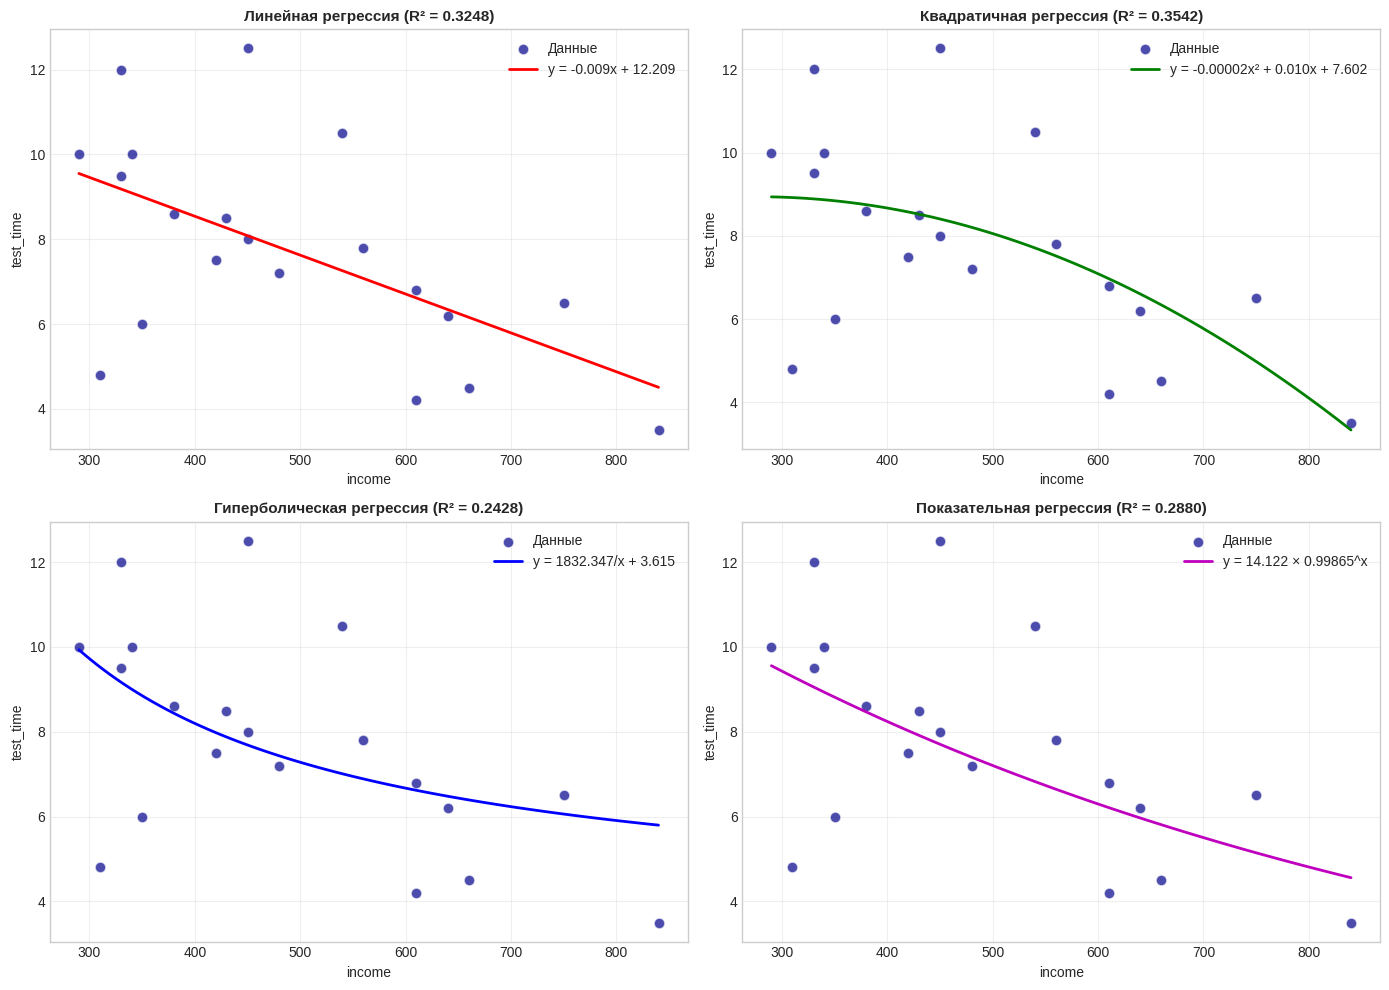

✓ Графики регрессии сохранены в graphics/regression_models.png


In [21]:
x_range = np.linspace(x.min(), x.max(), 100)

y_lin_range = w1_lin * x_range + w0_lin
y_quad_range = w2_quad * x_range**2 + w1_quad * x_range + w0_quad

x_range_safe = np.where(x_range == 0, 1e-10, x_range)
y_hyp_range = w1_hyp / x_range_safe + w0_hyp
y_exp_range = w0_exp * (w1_exp ** x_range)

fig, axes = plt.subplots(2, 2, figsize=(14, 10))

# Линейная
axes[0, 0].scatter(x, y, c='darkblue', alpha=0.7, s=60, edgecolors='white', label='Данные')
axes[0, 0].plot(x_range, y_lin_range, 'r-', linewidth=2, label=f'y = {w1_lin:.3f}x + {w0_lin:.3f}')
axes[0, 0].set_title(f'Линейная регрессия (R² = {r2_lin:.4f})', fontsize=11, fontweight='bold')
axes[0, 0].set_xlabel(col1_name)
axes[0, 0].set_ylabel(col2_name)
axes[0, 0].legend()
axes[0, 0].grid(True, alpha=0.3)

# Квадратичная
axes[0, 1].scatter(x, y, c='darkblue', alpha=0.7, s=60, edgecolors='white', label='Данные')
axes[0, 1].plot(x_range, y_quad_range, 'g-', linewidth=2, 
                label=f'y = {w2_quad:.5f}x² + {w1_quad:.3f}x + {w0_quad:.3f}')
axes[0, 1].set_title(f'Квадратичная регрессия (R² = {r2_quad:.4f})', fontsize=11, fontweight='bold')
axes[0, 1].set_xlabel(col1_name)
axes[0, 1].set_ylabel(col2_name)
axes[0, 1].legend()
axes[0, 1].grid(True, alpha=0.3)

# Гиперболическая
axes[1, 0].scatter(x, y, c='darkblue', alpha=0.7, s=60, edgecolors='white', label='Данные')
axes[1, 0].plot(x_range, y_hyp_range, 'b-', linewidth=2, label=f'y = {w1_hyp:.3f}/x + {w0_hyp:.3f}')
axes[1, 0].set_title(f'Гиперболическая регрессия (R² = {r2_hyp:.4f})', fontsize=11, fontweight='bold')
axes[1, 0].set_xlabel(col1_name)
axes[1, 0].set_ylabel(col2_name)
axes[1, 0].legend()
axes[1, 0].grid(True, alpha=0.3)

# Показательная
axes[1, 1].scatter(x, y, c='darkblue', alpha=0.7, s=60, edgecolors='white', label='Данные')
axes[1, 1].plot(x_range, y_exp_range, 'm-', linewidth=2, label=f'y = {w0_exp:.3f} × {w1_exp:.5f}^x')
axes[1, 1].set_title(f'Показательная регрессия (R² = {r2_exp:.4f})', fontsize=11, fontweight='bold')
axes[1, 1].set_xlabel(col1_name)
axes[1, 1].set_ylabel(col2_name)
axes[1, 1].legend()
axes[1, 1].grid(True, alpha=0.3)

plt.tight_layout()
plt.savefig('graphics/regression_models.png', dpi=150, bbox_inches='tight')
plt.show()

print("✓ Графики регрессии сохранены в graphics/regression_models.png")


## 4. Проверка критерием Фишера


In [22]:
def fisher_f_test(y_true, y_pred, k, alpha=0.05):
    """
    Критерий Фишера для проверки адекватности модели регрессии.
    
    Параметры:
    - y_true: фактические значения
    - y_pred: предсказанные значения
    - k: количество параметров регрессии (не считая свободного члена)
    - alpha: уровень значимости
    
    Возвращает:
    - F-статистика
    - p-value
    - Критическое значение F
    - Вывод о значимости
    """
    n = len(y_true)
    y_mean = np.mean(y_true)
    
    SS_reg = np.sum((y_pred - y_mean) ** 2)
    
    SS_res = np.sum((y_true - y_pred) ** 2)
    
    df_reg = k
    df_res = n - k - 1
    
    if df_res <= 0 or SS_res == 0:
        return np.nan, np.nan, np.nan, "Недостаточно данных"
    
    MS_reg = SS_reg / df_reg
    MS_res = SS_res / df_res
    F_stat = MS_reg / MS_res
    
    p_value = 1 - stats.f.cdf(F_stat, df_reg, df_res)
    
    F_crit = stats.f.ppf(1 - alpha, df_reg, df_res)
    
    if F_stat > F_crit:
        conclusion = "Модель АДЕКВАТНА (H0 отвергается)"
    else:
        conclusion = "Модель НЕАДЕКВАТНА (H0 не отвергается)"
    
    return F_stat, p_value, F_crit, conclusion

print("=" * 60)
print("КРИТЕРИЙ ФИШЕРА")
print("=" * 60)

print(f"\nПроверка лучшей модели ({best_model}):")
print("-" * 50)
best_pred = models[best_model]['pred']
best_k = models[best_model]['k']
F_best, p_best, F_crit_best, conclusion_best = fisher_f_test(y, best_pred, best_k)
print(f"  F-статистика:     {F_best:.4f}")
print(f"  p-value:          {p_best:.6f}")
print(f"  F-критическое:    {F_crit_best:.4f}")
print(f"  Вывод: {conclusion_best}")

print(f"\nПроверка худшей модели ({worst_model}):")
print("-" * 50)
worst_pred = models[worst_model]['pred']
worst_k = models[worst_model]['k']
F_worst, p_worst, F_crit_worst, conclusion_worst = fisher_f_test(y, worst_pred, worst_k)
print(f"  F-статистика:     {F_worst:.4f}")
print(f"  p-value:          {p_worst:.6f}")
print(f"  F-критическое:    {F_crit_worst:.4f}")
print(f"  Вывод: {conclusion_worst}")


КРИТЕРИЙ ФИШЕРА

Проверка лучшей модели (Квадратичная):
--------------------------------------------------
  F-статистика:     4.6615
  p-value:          0.024320
  F-критическое:    3.5915
  Вывод: Модель АДЕКВАТНА (H0 отвергается)

Проверка худшей модели (Гиперболическая):
--------------------------------------------------
  F-статистика:     5.7709
  p-value:          0.027299
  F-критическое:    4.4139
  Вывод: Модель АДЕКВАТНА (H0 отвергается)


## 5. Выводы


In [23]:
print("=" * 60)
print("ВЫВОДЫ")
print("=" * 60)

print(f"""
5.1. АНАЛИЗ КОРРЕЛЯЦИЙ:
─────────────────────────
• Коэффициент Фехнера ({fechner_r:.4f}) показывает {'положительную' if fechner_r > 0 else 'отрицательную'} 
  согласованность знаков отклонений от средних значений.

• Коэффициент Пирсона ({pearson_r:.4f}) с 95% ДИ [{pearson_ci[0]:.4f}, {pearson_ci[1]:.4f}]
  указывает на {'сильную' if abs(pearson_r) > 0.7 else 'умеренную' if abs(pearson_r) > 0.5 else 'слабую'} 
  {'положительную' if pearson_r > 0 else 'отрицательную'} линейную связь.
  {'Связь статистически значима (p < 0.05)' if pearson_p < 0.05 else 'Связь статистически незначима (p ≥ 0.05)'}.

• Коэффициент Спирмена ({spearman_r:.4f}) оценивает монотонную связь между переменными.
  {'Связь статистически значима' if spearman_p < 0.05 else 'Связь статистически незначима'}.

• Коэффициент Кендалла ({kendall_r:.4f}) - более робастная оценка ранговой корреляции.
  {'Связь статистически значима' if kendall_p < 0.05 else 'Связь статистически незначима'}.

5.2. ВИЗУАЛИЗАЦИЯ:
─────────────────────────
• Гистограммы показывают распределение переменных {col1_name} и {col2_name}.
• Диаграмма рассеяния демонстрирует характер взаимосвязи между переменными.
• {'Наблюдается тенденция к уменьшению' if pearson_r < 0 else 'Наблюдается тенденция к увеличению'} 
  {col2_name} при увеличении {col1_name}.

5.3. РЕГРЕССИОННЫЕ МОДЕЛИ:
─────────────────────────
• Лучшая модель: {best_model} с R² = {models[best_model]['r2']:.4f}
  (объясняет {models[best_model]['r2']*100:.1f}% дисперсии данных)

• Худшая модель: {worst_model} с R² = {models[worst_model]['r2']:.4f}
  (объясняет {models[worst_model]['r2']*100:.1f}% дисперсии данных)

• Линейная регрессия (вручную): y = {w1_lin:.4f}x + {w0_lin:.4f}
  При увеличении {col1_name} на 1 единицу, {col2_name} 
  {'увеличивается' if w1_lin > 0 else 'уменьшается'} на {abs(w1_lin):.4f} единиц.

5.4. КРИТЕРИЙ ФИШЕРА:
─────────────────────────
• {best_model} модель: F = {F_best:.4f}, p = {p_best:.6f}
  {conclusion_best}

• {worst_model} модель: F = {F_worst:.4f}, p = {p_worst:.6f}
  {conclusion_worst}

5.5. ОБЩИЙ ВЫВОД:
─────────────────────────
Между переменными {col1_name} и {col2_name} существует 
{'сильная' if abs(pearson_r) > 0.7 else 'умеренная' if abs(pearson_r) > 0.5 else 'слабая'} 
{'положительная' if pearson_r > 0 else 'отрицательная'} корреляционная связь.
Наилучшим образом данные описывает {best_model.lower()} модель регрессии.
""")

print("=" * 60)
print("АНАЛИЗ ЗАВЕРШЕН")
print("=" * 60)


ВЫВОДЫ

5.1. АНАЛИЗ КОРРЕЛЯЦИЙ:
─────────────────────────
• Коэффициент Фехнера (-0.4000) показывает отрицательную 
  согласованность знаков отклонений от средних значений.

• Коэффициент Пирсона (-0.5699) с 95% ДИ [-0.8085, -0.1703]
  указывает на умеренную 
  отрицательную линейную связь.
  Связь статистически значима (p < 0.05).

• Коэффициент Спирмена (-0.5392) оценивает монотонную связь между переменными.
  Связь статистически значима.

• Коэффициент Кендалла (-0.4362) - более робастная оценка ранговой корреляции.
  Связь статистически значима.

5.2. ВИЗУАЛИЗАЦИЯ:
─────────────────────────
• Гистограммы показывают распределение переменных income и test_time.
• Диаграмма рассеяния демонстрирует характер взаимосвязи между переменными.
• Наблюдается тенденция к уменьшению 
  test_time при увеличении income.

5.3. РЕГРЕССИОННЫЕ МОДЕЛИ:
─────────────────────────
• Лучшая модель: Квадратичная с R² = 0.3542
  (объясняет 35.4% дисперсии данных)

• Худшая модель: Гиперболическая с R² = 0.2